# Maxflow problem

A network is represent in the diagram below:

![alt text](https://i.imgur.com/XYDSpjY.png)

The number indicates the capacity of the flow in each direction. For example, the flow capacity from A to G is 10 units, but the flow capacity from G to A is 0.

Find the maximum flow of this network where A is the source and J is the sink.

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

In [39]:
total_node=10
G=nx.DiGraph(directed=True)
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
G.add_weighted_edges_from([('A', 'F', 10), ('A', 'E', 30), ('A', 'D', 15), ('A', 'G', 10), ('A', 'H', 40), ('A', 'I', 30),
                           ('D', 'A', 0), ('D', 'E', 10), ('D', 'B', 10), ('E', 'D', 10), ('E', 'A', 0), ('E', 'F', 20),
                           ('E', 'C', 15), ('F', 'A', 0), ('F', 'E', 20), ('F', 'H', 0), ('F', 'J', 20), ('J', 'F', 0),
                           ('J', 'H', 0), ('J', 'I', 0), ('B', 'D', 10), ('B', 'C', 8), ('C', 'B', 0), ('C', 'E', 0),
                           ('C', 'H', 30), ('G', 'A', 0), ('G', 'H', 15), ('H', 'G', 15), ('H', 'C', 30), ('H', 'F', 20),
                           ('H', 'J', 70), ('H', 'I', 30), ('H', 'A', 0), ('I', 'H', 30), ('I', 'J', 50), ('I', 'A', 0)])

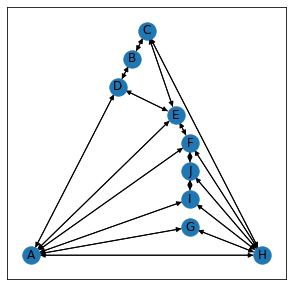

In [40]:
plt.figure(figsize=(5, 5))
pos=nx.planar_layout(G)
nx.draw_networkx(G, pos)
#nx.draw(G)

In [41]:
# using LP
from pulp import LpMaximize, LpMinimize, LpStatus, lpSum, LpVariable, LpProblem
import pulp
solver_list=pulp.listSolvers(onlyAvailable=True)
print(solver_list)

No parameters matching '_test' found
['GUROBI', 'PULP_CBC_CMD']


In [60]:
model=LpProblem(name="maxflow_problem", sense=LpMaximize)

In [61]:
x={(i[1][0], i[1][1]): LpVariable(name=f'e{i}', lowBound=0, cat="Integer") for i in enumerate(G.edges)}
x
#C=LpVariable(name="Capacity", lowBound=0, cat="Integer")

{('A', 'F'): e(0,_('A',_'F')),
 ('A', 'E'): e(1,_('A',_'E')),
 ('A', 'D'): e(2,_('A',_'D')),
 ('A', 'G'): e(3,_('A',_'G')),
 ('A', 'H'): e(4,_('A',_'H')),
 ('A', 'I'): e(5,_('A',_'I')),
 ('B', 'D'): e(6,_('B',_'D')),
 ('B', 'C'): e(7,_('B',_'C')),
 ('C', 'B'): e(8,_('C',_'B')),
 ('C', 'E'): e(9,_('C',_'E')),
 ('C', 'H'): e(10,_('C',_'H')),
 ('D', 'A'): e(11,_('D',_'A')),
 ('D', 'E'): e(12,_('D',_'E')),
 ('D', 'B'): e(13,_('D',_'B')),
 ('E', 'D'): e(14,_('E',_'D')),
 ('E', 'A'): e(15,_('E',_'A')),
 ('E', 'F'): e(16,_('E',_'F')),
 ('E', 'C'): e(17,_('E',_'C')),
 ('F', 'A'): e(18,_('F',_'A')),
 ('F', 'E'): e(19,_('F',_'E')),
 ('F', 'H'): e(20,_('F',_'H')),
 ('F', 'J'): e(21,_('F',_'J')),
 ('G', 'A'): e(22,_('G',_'A')),
 ('G', 'H'): e(23,_('G',_'H')),
 ('H', 'G'): e(24,_('H',_'G')),
 ('H', 'C'): e(25,_('H',_'C')),
 ('H', 'F'): e(26,_('H',_'F')),
 ('H', 'J'): e(27,_('H',_'J')),
 ('H', 'I'): e(28,_('H',_'I')),
 ('H', 'A'): e(29,_('H',_'A')),
 ('I', 'H'): e(30,_('I',_'H')),
 ('I', 'J'): e(31,

In [62]:
# objective function: maximize flow to destination J
model+=lpSum(x[(e[0], e[1])] for e in G.edges if e[1] == 'J')

In [63]:
# constraint 1: does not exceed capacity (x[u, v] <= C{u, v})
print("1st Constraint")
for e in enumerate(G.edges(data=True)):
    print('  ', e[0], ':', e[1][0], '->', e[1][1], ':', e[1][2]['weight'])
    model+=x[(e[1][0], e[1][1])] <= e[1][2]['weight']
    
# constraint 2: non-source & non-sink (incoming - outgoing = 0, x[(?, v)]-x[(v, ?)] = 0) 
print("2nd Constraint")
for index, v in enumerate(G.nodes):
    if v != 'A' and v != 'J':
        model+=lpSum(x[(e[0], e[1])] for e in G.edges() if e[1] == v)-lpSum(x[(e[0], e[1])] for e in G.edges() if e[0]==v) == 0
        # print check of newbie OwO
        print(v)
        for e in G.edges():
            if e[1] == v:
                print('  in', e[0], '->', e[1])
            if e[0] == v:
                print('  out', e[0], '->', e[1])
                

# Actually I don't have to check the two left over because we just want to maximize flow. How much will it flow, that is, the value that it will send to the destination
# constraint 3: source node (incoming - outgoing = -C)
# constraint 4: sink node (incoing - outgoing = C)
    
#for u, v, d in G.edges(data=True):
#    print(f"({u}, {v}) {d=}")

1st Constraint
   0 : A -> F : 10
   1 : A -> E : 30
   2 : A -> D : 15
   3 : A -> G : 10
   4 : A -> H : 40
   5 : A -> I : 30
   6 : B -> D : 10
   7 : B -> C : 8
   8 : C -> B : 0
   9 : C -> E : 0
   10 : C -> H : 30
   11 : D -> A : 0
   12 : D -> E : 10
   13 : D -> B : 10
   14 : E -> D : 10
   15 : E -> A : 0
   16 : E -> F : 20
   17 : E -> C : 15
   18 : F -> A : 0
   19 : F -> E : 20
   20 : F -> H : 0
   21 : F -> J : 20
   22 : G -> A : 0
   23 : G -> H : 15
   24 : H -> G : 15
   25 : H -> C : 30
   26 : H -> F : 20
   27 : H -> J : 70
   28 : H -> I : 30
   29 : H -> A : 0
   30 : I -> H : 30
   31 : I -> J : 50
   32 : I -> A : 0
   33 : J -> F : 0
   34 : J -> H : 0
   35 : J -> I : 0
2nd Constraint
B
  out B -> D
  out B -> C
  in C -> B
  in D -> B
C
  in B -> C
  out C -> B
  out C -> E
  out C -> H
  in E -> C
  in H -> C
D
  in A -> D
  in B -> D
  out D -> A
  out D -> E
  out D -> B
  in E -> D
E
  in A -> E
  in C -> E
  in D -> E
  out E -> D
  out E -> A
  o

In [64]:
model.solve()
LpStatus[model.status]

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/00640953c5fe4e7d8090a155338b8315-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/00640953c5fe4e7d8090a155338b8315-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 49 COLUMNS
At line 215 RHS
At line 260 BOUNDS
At line 297 ENDATA
Problem MODEL has 44 rows, 36 columns and 90 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 123 - 0.00 seconds
Cgl0004I processed model has 8 rows, 18 columns (18 integer (0 of which binary)) and 33 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of -123 found by DiveCoefficient after 0 iterations and 0 nodes (0.01 seconds)
Cbc0001I Search completed - best objective -123, took 0 iterations and 0 nodes (0.01 seconds)
Cbc0035I

'Optimal'

In [65]:
model.objective.value()

123.0

In [66]:
model

maxflow_problem:
MAXIMIZE
1*e(21,_('F',_'J')) + 1*e(27,_('H',_'J')) + 1*e(31,_('I',_'J')) + 0
SUBJECT TO
_C1: e(0,_('A',_'F')) <= 10

_C2: e(1,_('A',_'E')) <= 30

_C3: e(2,_('A',_'D')) <= 15

_C4: e(3,_('A',_'G')) <= 10

_C5: e(4,_('A',_'H')) <= 40

_C6: e(5,_('A',_'I')) <= 30

_C7: e(6,_('B',_'D')) <= 10

_C8: e(7,_('B',_'C')) <= 8

_C9: e(8,_('C',_'B')) <= 0

_C10: e(9,_('C',_'E')) <= 0

_C11: e(10,_('C',_'H')) <= 30

_C12: e(11,_('D',_'A')) <= 0

_C13: e(12,_('D',_'E')) <= 10

_C14: e(13,_('D',_'B')) <= 10

_C15: e(14,_('E',_'D')) <= 10

_C16: e(15,_('E',_'A')) <= 0

_C17: e(16,_('E',_'F')) <= 20

_C18: e(17,_('E',_'C')) <= 15

_C19: e(18,_('F',_'A')) <= 0

_C20: e(19,_('F',_'E')) <= 20

_C21: e(20,_('F',_'H')) <= 0

_C22: e(21,_('F',_'J')) <= 20

_C23: e(22,_('G',_'A')) <= 0

_C24: e(23,_('G',_'H')) <= 15

_C25: e(24,_('H',_'G')) <= 15

_C26: e(25,_('H',_'C')) <= 30

_C27: e(26,_('H',_'F')) <= 20

_C28: e(27,_('H',_'J')) <= 70

_C29: e(28,_('H',_'I')) <= 30

_C30: e(29,_('H',_'A'))